In [1]:
#import the libaryies 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt


import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE 

%matplotlib inline
%config InlineBackend.figure_format = "retina"

Using TensorFlow backend.


In [2]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [3]:
#read the dataset
df = pd.read_csv("Airlines Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [5]:
# check the shape of the dataset
df.shape

(14640, 15)

In [6]:
#check the null values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# computet the instances of each class
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
#drop the null value and other columns
df_drop = df.drop(["tweet_id","airline_sentiment_confidence","negativereason","negativereason_confidence",
                  "airline_sentiment_gold","name","negativereason_gold","retweet_count","tweet_coord","tweet_created","tweet_location","user_timezone","airline"],axis = 1)
df_drop.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [11]:
#rename the columns
df_drop.columns = ["Class","text"]
df_drop.head()

,Class,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


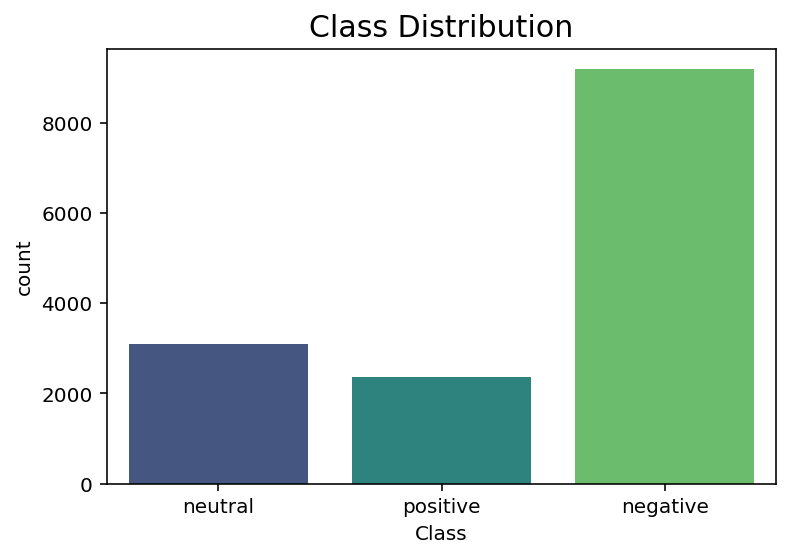

In [15]:
# plot the balancing of classes
import seaborn as sns
sns.countplot(x = "Class",data = df_drop, palette = "viridis")
plt.title("Class Distribution",fontsize = 15)
plt.show()

In [17]:
#drop the duplicates 
df_drop= df_drop.drop_duplicates()
df_drop = df_drop.reset_index(drop = True)
df_drop.head()

,Class,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [19]:
#recheck the dataset after deduplication
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14452 entries, 0 to 14451
Data columns (total 2 columns):
Class    14452 non-null object
text     14452 non-null object
dtypes: object(2)
memory usage: 225.9+ KB


In [20]:
#data cleaning
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [21]:
#data cleaning
import codecs
import unidecode
import re
import spacy
nlp = spacy.load('en')

def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [22]:
#apply the data cleaning function to clean the textual data
df_drop['clean_text'] = [spacy_cleaner(t) for t in df_drop.text]

In [23]:
#remove double quotes and numerics
for i in range(len(df_drop)):
    df_drop['clean_text'].iloc[i] = re.sub('" ',' ', df_drop['clean_text'].iloc[i])
    df_drop['clean_text'].iloc[i] = ''.join([word for word in df_drop['clean_text'].iloc[i]
                                          if not word.isdigit()])

In [24]:
#check the dataset after cleaning
df_drop.head()

,Class,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,what say
1,positive,@VirginAmerica plus you've added commercials t...,plus you have add commercial to the experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I do not today must mean I need to take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,it be really aggressive to blast obnoxious ent...
4,negative,@VirginAmerica and it's a really big bad thing...,and it be really big bad thing about it


In [25]:
#save the dataset to local
df_drop.to_csv("clean_tweet.csv",encoding = "utf-8")

In [26]:
my_df = df_drop
my_df.head()

,Class,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,what say
1,positive,@VirginAmerica plus you've added commercials t...,plus you have add commercial to the experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I do not today must mean I need to take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,it be really aggressive to blast obnoxious ent...
4,negative,@VirginAmerica and it's a really big bad thing...,and it be really big bad thing about it


In [32]:
my_df["text"].iloc[70]

'@virginamerica Need to change reservation. Have Virgin credit card. Do I need to modify on phone to waive change fee? Or can I do online?'

In [31]:
my_df["clean_text"].iloc[70]

'need to change reservation have virgin credit card do I need to modify on phone to waive change fee or can I do online'

In [33]:
#change categorical label into numerical 
my_df["target"] = my_df["Class"].apply(lambda x:0 if x =="negative" else 1 if x =="neutral" else 2)

In [34]:
my_df.head()

,Class,text,clean_text,target
0,neutral,@VirginAmerica What @dhepburn said.,what say,1
1,positive,@VirginAmerica plus you've added commercials t...,plus you have add commercial to the experience...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I do not today must mean I need to take anothe...,1
3,negative,@VirginAmerica it's really aggressive to blast...,it be really aggressive to blast obnoxious ent...,0
4,negative,@VirginAmerica and it's a really big bad thing...,and it be really big bad thing about it,0


In [35]:
#word cloud-negative
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.clean_text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

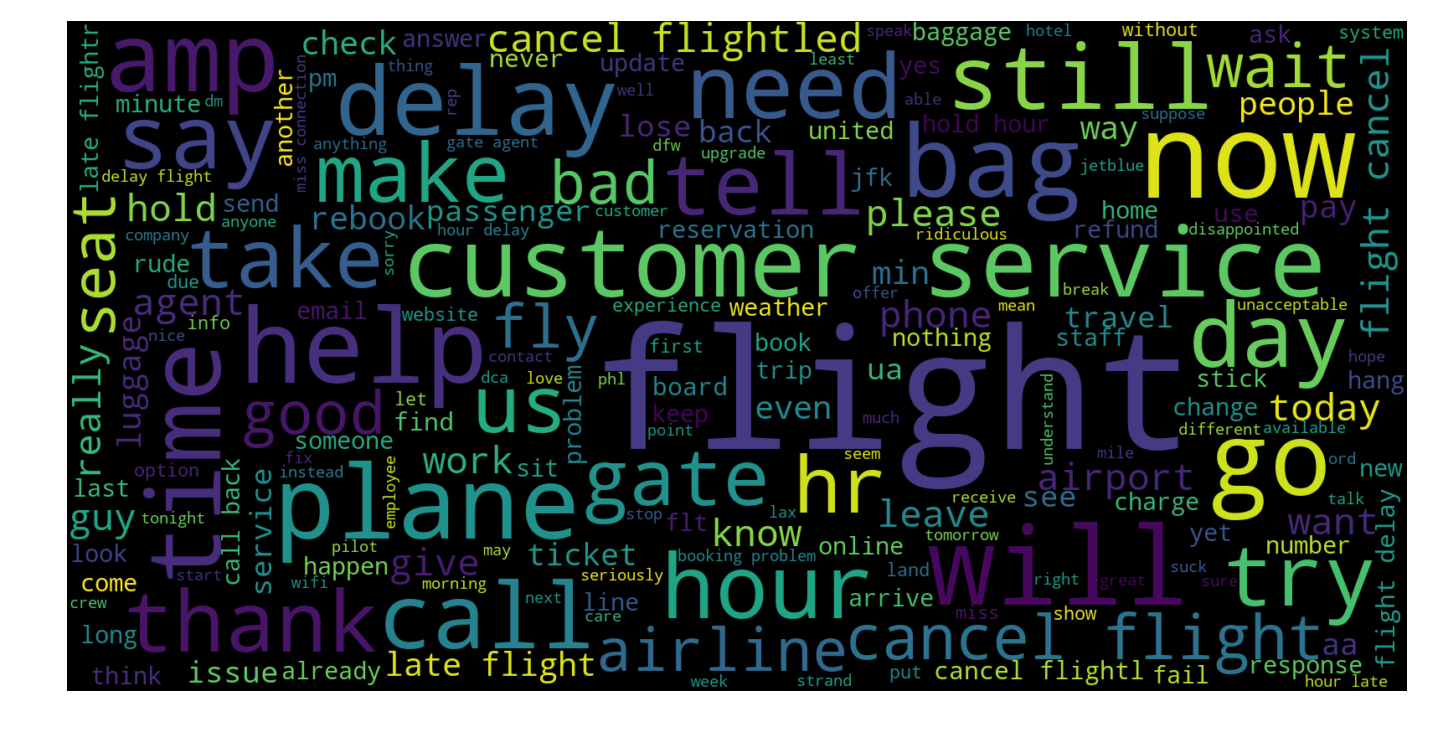

In [36]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
#word cloud-positive
pos_tweets = my_df[my_df.target == 2]
pos_string = []
for t in pos_tweets.clean_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

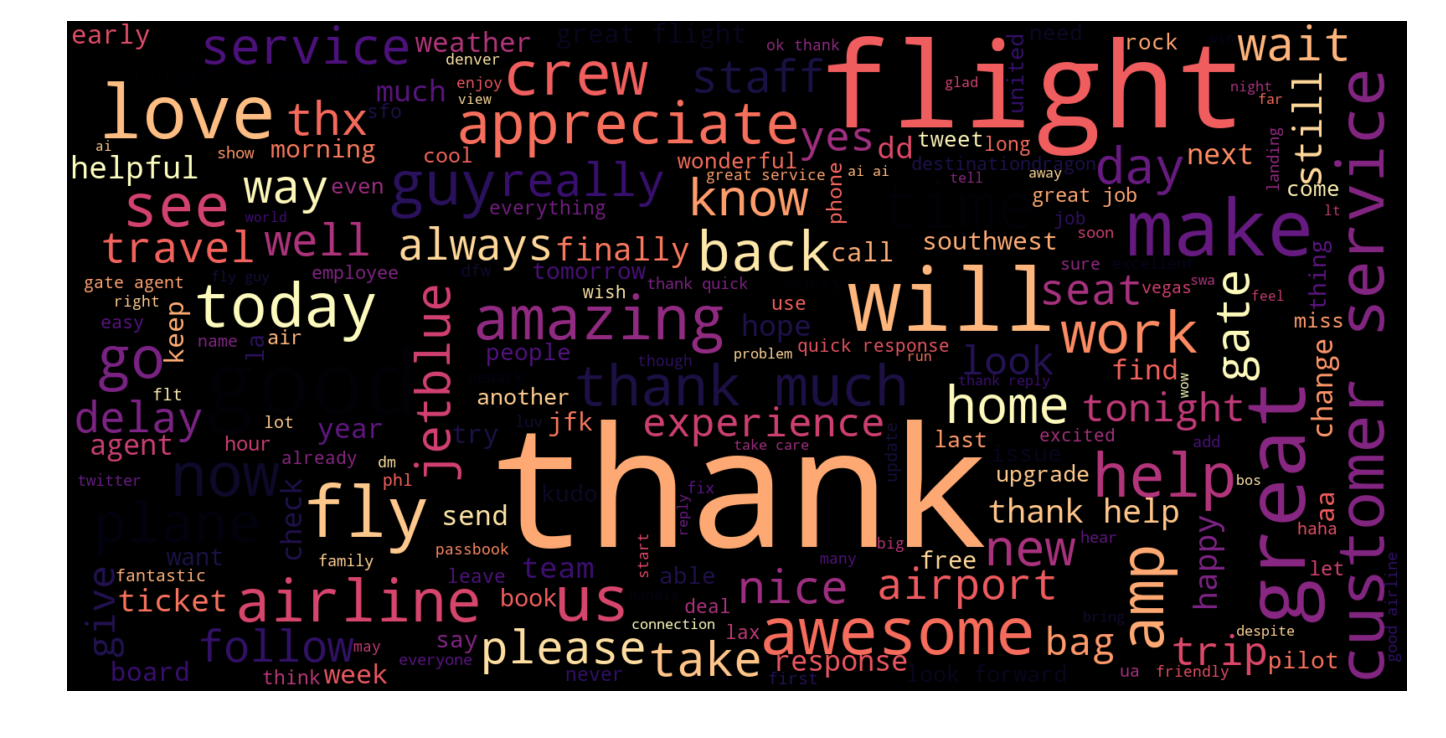

In [38]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
#word cloud-neutral
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.clean_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

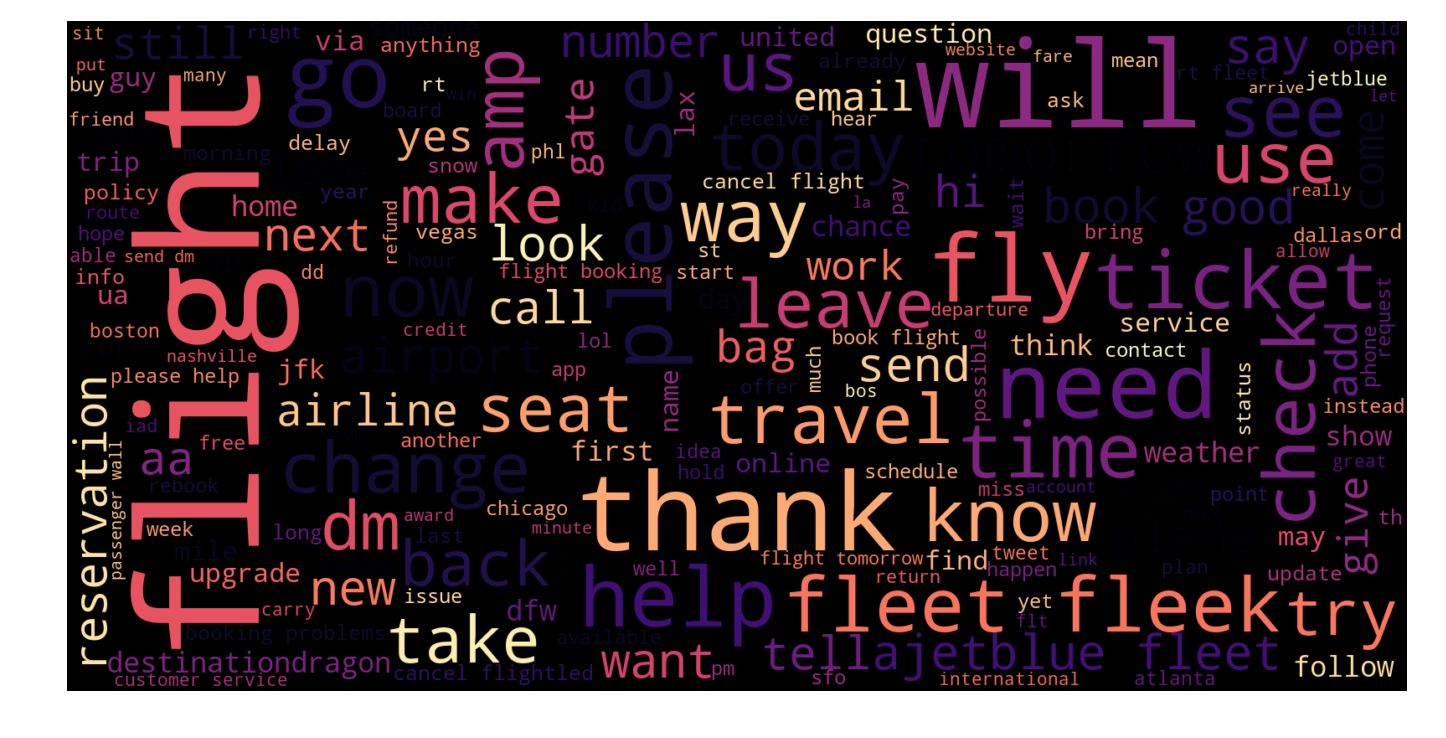

In [40]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [88]:
#original imbalanced data-logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words=None, max_features=9000, ngram_range=(1, 1))
lr = LogisticRegression()

In [89]:
#cross validation with stratified sampling
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [90]:
from sklearn.pipeline import Pipeline
import numpy as np

original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', lr)
])

In [91]:
lr_cv(5, df_drop.clean_text, df_drop.Class, original_pipeline, 'macro')

C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              negative    neutral     positive
precision: [0.80687094 0.68577982 0.83443709]
recall:    [0.9559956  0.48697068 0.54782609]
f1 score:  [0.87512588 0.56952381 0.66141732]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81378987 0.74634146 0.81428571]
recall:    [0.95434543 0.49837134 0.61956522]
f1 score:  [0.87848101 0.59765625 0.7037037 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80799628 0.72104019 0.85443038]
recall:    [0.95652174 0.49755302 0.58695652]
f1 score:  [0.87600806 0.58880309 0.69587629]
--------------------------------------------------
              negative    neutral     positive
precision: [0.80111266 0.74009901 0.82926829]
recall:    [0.95101816 0.48776509 0.59259259]
f1 score:  [0.86965274 0.58800393 0.69123253]
--------------------------------------------------
              negative    neutral     positive
precision

In [92]:
#oversampling-smote
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE 

In [93]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),lr)

In [94]:
lr_cv(5, df_drop.clean_text, df_drop.target, SMOTE_pipeline, 'macro')


C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              negative    neutral     positive
precision: [0.88604651 0.57808219 0.68325792]
recall:    [0.83828383 0.68729642 0.65652174]
f1 score:  [0.86150367 0.62797619 0.66962306]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89504717 0.5997151  0.70647773]
recall:    [0.8349835  0.68566775 0.75869565]
f1 score:  [0.86397268 0.63981763 0.73165618]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89306698 0.581363   0.71215352]
recall:    [0.83654375 0.68189233 0.72608696]
f1 score:  [0.86388178 0.62762763 0.71905274]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88228438 0.59941945 0.70661157]
recall:    [0.83324161 0.67373573 0.74509804]
f1 score:  [0.85706199 0.6344086  0.72534464]
--------------------------------------------------
              negative    neutral     positive
precision

In [95]:
#original imbalanced data set -support vector
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=9000, ngram_range=(1, 1))
sv = LinearSVC()

In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def sv_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        sv_fit = pipeline.fit(X[train], Y[train])
        prediction = sv_fit.predict(X[test])
        scores = sv_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [97]:
from sklearn.pipeline import Pipeline
import numpy as np

original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', sv)
])

In [98]:
sv_cv(5, df_drop.clean_text, df_drop.Class, original_pipeline, 'macro') 

              negative    neutral     positive
precision: [0.83659148 0.62429907 0.7679558 ]
recall:    [0.9180418  0.54397394 0.60434783]
f1 score:  [0.87542617 0.58137511 0.67639903]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84462557 0.65583174 0.74876847]
recall:    [0.9119912  0.55863192 0.66086957]
f1 score:  [0.87701666 0.60334213 0.70207852]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84       0.63068182 0.76485788]
recall:    [0.91304348 0.54323002 0.64347826]
f1 score:  [0.875      0.58369851 0.69893743]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83702213 0.68421053 0.75429975]
recall:    [0.91579527 0.55138662 0.66884532]
f1 score:  [0.87463863 0.61065944 0.70900693]
--------------------------------------------------
              negative    neutral     positive
precision

In [99]:
#over sampling -linear svc
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),sv)

In [100]:
sv_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

              negative    neutral     positive
precision: [0.87309645 0.55947137 0.66666667]
recall:    [0.85148515 0.62052117 0.63478261]
f1 score:  [0.86215539 0.58841699 0.65033408]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88146426 0.57856094 0.6755102 ]
recall:    [0.83443344 0.64169381 0.71956522]
f1 score:  [0.85730432 0.60849421 0.69684211]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87406124 0.5616836  0.65957447]
recall:    [0.83269125 0.63132137 0.67391304]
f1 score:  [0.85287486 0.59447005 0.66666667]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87183908 0.58459215 0.67351129]
recall:    [0.83489268 0.63132137 0.71459695]
f1 score:  [0.85296598 0.60705882 0.69344609]
--------------------------------------------------
              negative    neutral     positive
precision

In [101]:
#original imbalanced data set -multinimia naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=9000, ngram_range=(1, 1))
nb = MultinomialNB()

In [102]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def nb_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        nb_fit = pipeline.fit(X[train], Y[train])
        prediction = nb_fit.predict(X[test])
        scores = nb_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [103]:
from sklearn.pipeline import Pipeline
import numpy as np

original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', nb)
])

In [104]:
nb_cv(5, my_df.clean_text, my_df.target, original_pipeline, 'macro') 

              negative    neutral     positive
precision: [0.66434336 0.77083333 0.88571429]
recall:    [0.99614961 0.12052117 0.13478261]
f1 score:  [0.79709507 0.2084507  0.23396226]
--------------------------------------------------
              negative    neutral     positive
precision: [0.66937569 0.82727273 0.82666667]
recall:    [0.99669967 0.14820847 0.13478261]
f1 score:  [0.80088398 0.25138122 0.2317757 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.66226138 0.77272727 0.8974359 ]
recall:    [0.99284535 0.11092985 0.15217391]
f1 score:  [0.79453865 0.19400856 0.26022305]
--------------------------------------------------
              negative    neutral     positive
precision: [0.66312317 0.79775281 0.91666667]
recall:    [0.99559714 0.11582382 0.14379085]
f1 score:  [0.7960396  0.2022792  0.24858757]
--------------------------------------------------
              negative    neutral     positive
precision

In [105]:
#smote-multinomialNB
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),nb)

In [106]:
nb_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

              negative    neutral     positive
precision: [0.85605649 0.58112583 0.68008949]
recall:    [0.86688669 0.57166124 0.66086957]
f1 score:  [0.86143755 0.57635468 0.67034179]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86581292 0.60232945 0.67676768]
recall:    [0.85533553 0.58957655 0.72826087]
f1 score:  [0.86054234 0.59588477 0.70157068]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85251216 0.59       0.69703872]
recall:    [0.8684645  0.57748777 0.66521739]
f1 score:  [0.86041439 0.58367683 0.6807564 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85722101 0.61072664 0.67287785]
recall:    [0.86241057 0.57585644 0.708061  ]
f1 score:  [0.85980796 0.59277918 0.69002123]
--------------------------------------------------
              negative    neutral     positive
precision

In [122]:
#original imbalanced data set -K-means
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=9000, ngram_range=(1, 1))
kn = KMeans(n_clusters=3,random_state = None)

In [130]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def kn_cv(splits, X, Y, pipeline,average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        kn_fit = pipeline.fit(X[train], Y[train])
        prediction = kn_fit.predict(X[test])
        #scores = accuracy_score(X[test],Y[test])
        
        accuracy.append(accuracy_score(Y[test],prediction) * 100)
        precision.append(precision_score(Y[test], prediction,average = average_method)*100)
        #print('              negative    neutral     positive')
        #print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction,average = average_method)*100)
        #print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction,average = average_method)*100)
        #print('f1 score: ',f1_score(Y[test], prediction, average=None))
        #print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [128]:
from sklearn.pipeline import Pipeline
import numpy as np

original_pipeline = Pipeline([
    ('vectorizer', tvec),
    ('classifier', kn)
])

In [129]:
kn_cv(5, my_df.clean_text, my_df.target, original_pipeline,'macro') 

              negative    neutral     positive
precision: [0.60031679 0.1501182  0.80263158]
recall:    [0.62541254 0.20684039 0.26521739]
f1 score:  [0.61260776 0.1739726  0.39869281]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78343195 0.16774194 0.14587738]
recall:    [0.36413641 0.04234528 0.6       ]
f1 score:  [0.49718363 0.06762029 0.23469388]
--------------------------------------------------
              negative    neutral     positive
precision: [0.59645352 0.1483871  0.06064073]
recall:    [0.61089708 0.03752039 0.11521739]
f1 score:  [0.60358891 0.05989583 0.07946027]
--------------------------------------------------
              negative    neutral     positive
precision: [0.6        0.14201183 0.0502994 ]
recall:    [0.6224546  0.03915171 0.09150327]
f1 score:  [0.61102107 0.06138107 0.06491499]
--------------------------------------------------
              negative    neutral     positive
precision

In [131]:
#smote -K-means
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),kn)

In [132]:
kn_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

accuracy: 28.72%
precision: 33.63%
recall: 34.01%
f1 score: 19.29%


In [136]:
#calculate the number of unique words in the text, including stop words
my_df["token_length"] = [len(x.split(" ")) for x in my_df.clean_text]
my_text = []
for i in range(len(my_df.clean_text)):
    for word in my_df["clean_text"].iloc[i].split():
        if word not in my_text:
            my_text.append(word)
len(my_text)

9969

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
#check the percentage of each class
print("Negative", round(len(my_df[my_df["Class"] == "negative"])/len(my_df)*100,2), " % of the dataset")
print("Neutral", round(len(my_df[my_df["Class"] == "neutral"])/len(my_df)*100,2), " % of the dataset")
print("Positive", round(len(my_df[my_df["Class"] == "positive"])/len(my_df)*100,2), " % of the dataset")

Negative 62.88  % of the dataset
Neutral 21.22  % of the dataset
Positive 15.9  % of the dataset


In [139]:
# separate the lable and text datat
X = my_df["clean_text"]
y = my_df["target"]

In [140]:
# split the traing set,test set
sss = StratifiedKFold(n_splits = 5,random_state = None,shuffle = False)
for train_index, test_index in sss.split(X,y):
    print("Train:",train_index,"Test:",test_index)
    original_Xtrain,original_Xtest = X.iloc[train_index],X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
#turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 2780  2782  2783 ... 14449 14450 14451] Test: [   0    1    2 ... 3092 3098 3101]
Train: [    0     1     2 ... 14449 14450 14451] Test: [2780 2782 2783 ... 5922 5923 5924]
Train: [    0     1     2 ... 14449 14450 14451] Test: [5651 5664 5665 ... 9599 9600 9601]
Train: [    0     1     2 ... 14449 14450 14451] Test: [ 7631  7633  7636 ... 11927 11928 11929]
Train: [    0     1     2 ... 11927 11928 11929] Test: [10495 10527 10529 ... 14449 14450 14451]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.62872957 0.21222866 0.15904177]
[0.62893735 0.21218415 0.1588785 ]


In [141]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Length of X (train): 11563 | Length of y (train): 11563
Length of X (test): 2889 | Length of y (test): 2889


In [142]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [143]:

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    #print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    #print ("accuracy score: {0:.2f}%".format(accuracy*100))
    #if accuracy > null_accuracy:
        #print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    #elif accuracy == null_accuracy:
        #print ("model has the same accuracy with the null accuracy")
    #else:
        #print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    #print ("train and test time: {0:.2f}s".format(train_test_time))
    #print ("-"*80)
    return accuracy, train_test_time

In [144]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,9001,500)

In [145]:
#smote-logistics regression
SMOTE_pipeline = make_pipeline(cvec, SMOTE(random_state=777),lr)

In [146]:
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        #print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(SMOTE_pipeline, original_Xtrain, original_ytrain, original_Xtest, original_ytest)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [147]:
%%time
from sklearn.metrics import accuracy_score
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wsw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)




C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 3min 10s


In [148]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 2min 24s


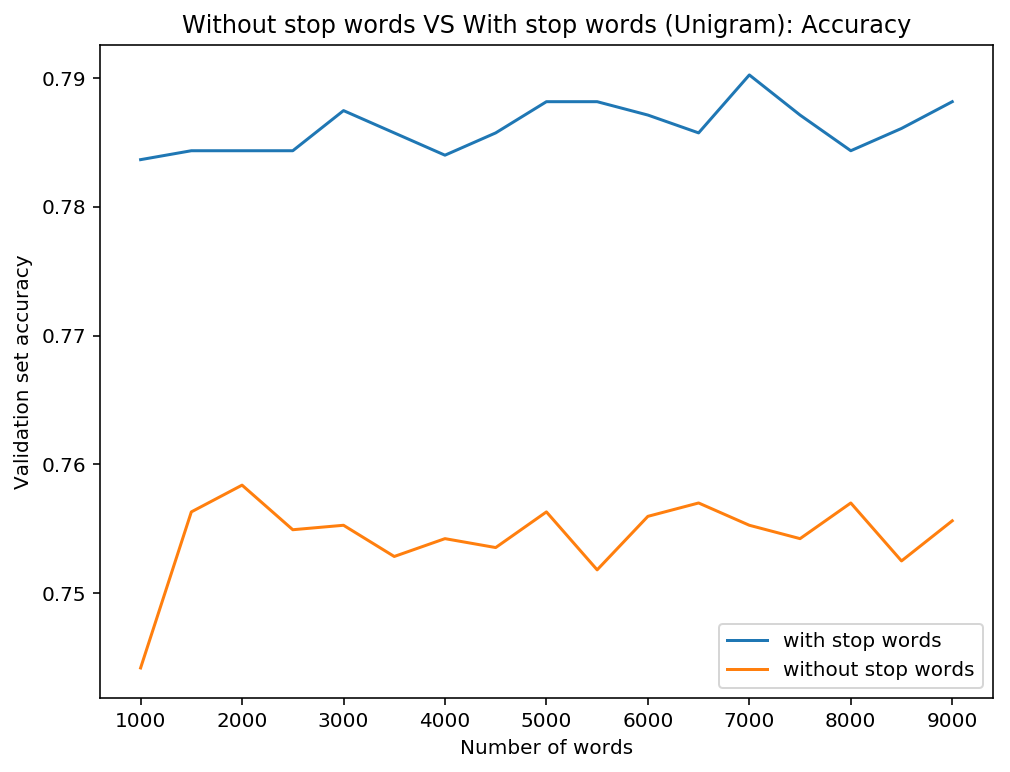

In [149]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
#nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wsw = pd.DataFrame(feature_result_wsw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
#plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wsw.nfeatures, nfeatures_plot_ug_wsw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of words")
plt.ylabel("Validation set accuracy")
plt.legend()

In [150]:
%%time
#extend the bag-of-words to bigrams, trigrams
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 4min 8s


In [151]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 4min 17s


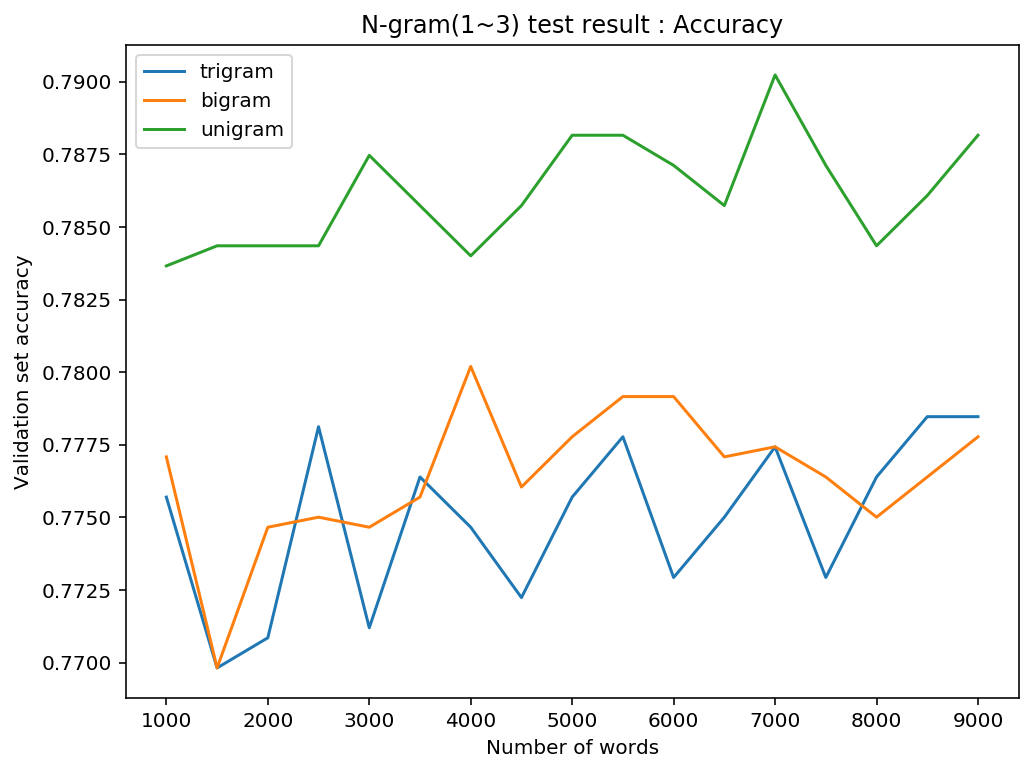

In [152]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of words")
plt.ylabel("Validation set accuracy")
plt.legend()

In [153]:
#experiment with tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [154]:
#smote-logistics regression
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),lr)

In [155]:
def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        #print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(SMOTE_pipeline, original_Xtrain, original_ytrain, original_Xtest, original_ytest)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [156]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 3min 50s


In [157]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 3min 50s


In [158]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Wall time: 4min 18s


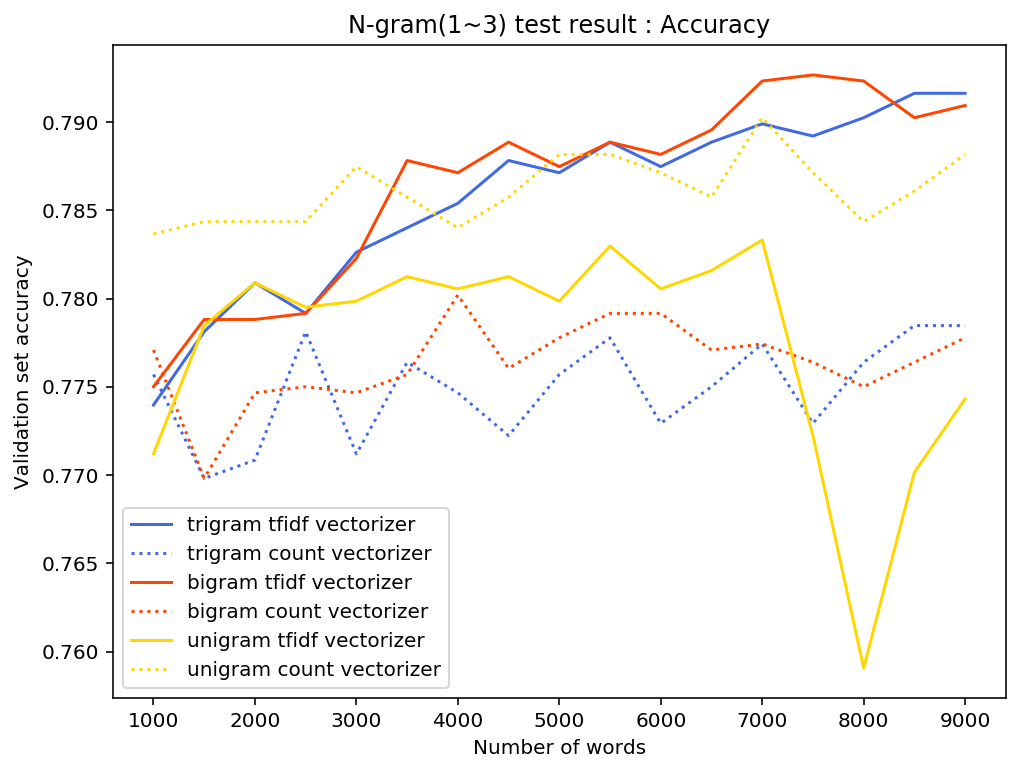

In [159]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of words")
plt.ylabel("Validation set accuracy")
plt.legend()

In [172]:
#experiment 3-logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words=None, max_features=8000, ngram_range=(1, 2))
lr = LogisticRegression()

In [173]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def lr_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [174]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),lr)

In [175]:
lr_cv(5, df_drop.clean_text, df_drop.target, SMOTE_pipeline, 'macro')

C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cafuc\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              negative    neutral     positive
precision: [0.86590662 0.6307947  0.71524664]
recall:    [0.87733773 0.62052117 0.69347826]
f1 score:  [0.8715847  0.62561576 0.70419426]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87945205 0.68872987 0.69685039]
recall:    [0.88283828 0.62703583 0.76956522]
f1 score:  [0.88114192 0.65643649 0.73140496]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86918919 0.65202109 0.71125265]
recall:    [0.88497523 0.60522023 0.72826087]
f1 score:  [0.87701118 0.62774958 0.71965628]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86555076 0.65961199 0.71914894]
recall:    [0.88222345 0.61011419 0.73638344]
f1 score:  [0.87380758 0.63389831 0.72766416]
--------------------------------------------------
              negative    neutral     positive
precision

In [176]:
#experiment3 -k-means
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=8000, ngram_range=(1,2))
kn = KMeans(n_clusters=3,random_state = None)

In [177]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def kn_cv(splits, X, Y, pipeline,average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        kn_fit = pipeline.fit(X[train], Y[train])
        prediction = kn_fit.predict(X[test])
        #scores = accuracy_score(X[test],Y[test])
        
        accuracy.append(accuracy_score(Y[test],prediction) * 100)
        precision.append(precision_score(Y[test], prediction,average = average_method)*100)
        #print('              negative    neutral     positive')
        #print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction,average = average_method)*100)
        #print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction,average = average_method)*100)
        #print('f1 score: ',f1_score(Y[test], prediction, average=None))
        #print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [178]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),kn)

In [179]:
kn_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

accuracy: 37.18%
precision: 40.88%
recall: 35.05%
f1 score: 24.52%


In [180]:
#experiment 3- multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=8000, ngram_range=(1, 2))
nb = MultinomialNB()

In [181]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def nb_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        nb_fit = pipeline.fit(X[train], Y[train])
        prediction = nb_fit.predict(X[test])
        scores = nb_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [182]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),nb)

In [183]:
nb_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

              negative    neutral     positive
precision: [0.87098592 0.6066879  0.66462168]
recall:    [0.85038504 0.62052117 0.70652174]
f1 score:  [0.8605622  0.61352657 0.68493151]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88289855 0.62745098 0.65585586]
recall:    [0.83773377 0.62540717 0.79130435]
f1 score:  [0.8597234  0.62642741 0.71724138]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87351106 0.59216966 0.66731518]
recall:    [0.84755091 0.59216966 0.74565217]
f1 score:  [0.8603352  0.59216966 0.70431211]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87868481 0.63819095 0.67424242]
recall:    [0.85305449 0.62153344 0.77559913]
f1 score:  [0.86567998 0.62975207 0.72137791]
--------------------------------------------------
              negative    neutral     positive
precision

In [184]:
#experiment 3- svm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words=None, max_features=8000, ngram_range=(1, 2))
sv = LinearSVC()

In [185]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def sv_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        sv_fit = pipeline.fit(X[train], Y[train])
        prediction = sv_fit.predict(X[test])
        scores = sv_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%%" % (np.mean(accuracy)))
    print("precision: %.2f%%" % (np.mean(precision)))
    print("recall: %.2f%%" % (np.mean(recall)))
    print("f1 score: %.2f%%" % (np.mean(f1)))

In [186]:
SMOTE_pipeline = make_pipeline(tvec, SMOTE(random_state=777),sv)

In [187]:
sv_cv(5, my_df.clean_text, my_df.target, SMOTE_pipeline, 'macro')

              negative    neutral     positive
precision: [0.86086957 0.6047619  0.70853081]
recall:    [0.87128713 0.62052117 0.65      ]
f1 score:  [0.86604702 0.61254019 0.67800454]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87959299 0.6453202  0.65175097]
recall:    [0.85588559 0.64006515 0.72826087]
f1 score:  [0.86757736 0.64268193 0.68788501]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86673949 0.61367521 0.69198312]
recall:    [0.87341772 0.58564437 0.71304348]
f1 score:  [0.87006579 0.59933222 0.70235546]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86750273 0.62872154 0.69008264]
recall:    [0.87561915 0.58564437 0.72766885]
f1 score:  [0.87154204 0.60641892 0.70837752]
--------------------------------------------------
              negative    neutral     positive
precision